In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.columns = data.columns.str.lower() # lower case
data.columns = map(lambda x : x.replace('-', '_').replace(' ', '_'), data.columns) 
data.rename(columns = {'employmentstatus':'employment_status'}, inplace = True) 
data.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [90]:
data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [5]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
# 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
# 2. Create a copy of the dataframe for the data wrangling.
# 3. Normalize the continuous variables. You can use any one method you want.
# 4. Encode the categorical variables
# 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
# 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [8]:
data = data.set_index('customer')

In [9]:
class preprocessing():
    
    def funk(self, data):
        self.categoricals_df = data.select_dtypes('object')
        self.discrete_df = data.select_dtypes('int64')
        self.continuous_df = data.select_dtypes('float64')
    
    def nulls(self, data):
        is_na = categoricals_df.isna()
        return is_na

In [10]:
# Load the continuous and discrete variables into continuous_df and discrete_df variables.
prep = preprocessing()
prep.funk(data)
prep.discrete_df.columns 
#prep.continuous_df




Index(['income', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [11]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [12]:
# Plot all the categorical variables with the proper plot. What can you see?
for col in prep.categoricals_df:
    print(prep.categoricals_df[col].value_counts(), '\n')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 

F    4658
M    4476
Name: gender, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Co

In [13]:
prep.categoricals_df.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [14]:
def plot_categoricals(data):
    for col in data.columns[:]:
        sns.countplot(x=data[col]).set_title(col)
        plt.figure(figsize=(10, 8))        
        

# plot_categoricals(prep.categoricals_df)

In [15]:
numerical = pd.concat([prep.discrete_df,prep.continuous_df], axis = 1)

In [16]:
data.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [17]:
# There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# Plot time variable. Can you extract something from it?

### Feature Extraction

In [18]:
prep.categoricals_df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [19]:
prep.categoricals_df['vehicle_size'] = prep.categoricals_df['vehicle_size'].apply(lambda x: x[0])
prep.categoricals_df['vehicle_size'].unique()

array(['M', 'S', 'L'], dtype=object)

In [20]:
prep.categoricals_df['renew_offer_type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [21]:
prep.categoricals_df['renew_offer_type'] = prep.categoricals_df['renew_offer_type'].apply(lambda x: x[0] + x[5])
prep.categoricals_df['renew_offer_type'].unique()

array(['O1', 'O3', 'O2', 'O4'], dtype=object)

### Feature Selection


In [22]:
numerical.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,total_claim_amount
customer,,,,,,,,
BU79786,56274,69,32,5,0,1,2763.519279,384.811147
QZ44356,0,94,13,42,0,8,6979.535903,1131.464935
AI49188,48767,108,18,38,0,2,12887.431650,566.472247
WW63253,0,106,18,65,0,7,7645.861827,529.881344
HB64268,43836,73,12,44,0,1,2813.692575,138.130879


In [23]:
numerical.corr()['income'].sort_values(ascending=False)

income                           1.000000
customer_lifetime_value          0.024366
number_of_open_complaints        0.006408
months_since_policy_inception   -0.000875
number_of_policies              -0.008656
monthly_premium_auto            -0.016665
months_since_last_claim         -0.026715
total_claim_amount              -0.355254
Name: income, dtype: float64

In [24]:
numerical.isna().sum()

income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
customer_lifetime_value          0
total_claim_amount               0
dtype: int64

In [25]:
numerical.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,total_claim_amount
customer,,,,,,,,
BU79786,56274,69,32,5,0,1,2763.519279,384.811147
QZ44356,0,94,13,42,0,8,6979.535903,1131.464935
AI49188,48767,108,18,38,0,2,12887.431650,566.472247
WW63253,0,106,18,65,0,7,7645.861827,529.881344
HB64268,43836,73,12,44,0,1,2813.692575,138.130879


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif_numericals = add_constant(numerical)
vif_numericals # .drop('HV2', axis=1)

,const,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,total_claim_amount
customer,,,,,,,,,
BU79786,1.0,56274,69,32,5,0,1,2763.519279,384.811147
QZ44356,1.0,0,94,13,42,0,8,6979.535903,1131.464935
AI49188,1.0,48767,108,18,38,0,2,12887.431650,566.472247
WW63253,1.0,0,106,18,65,0,7,7645.861827,529.881344
HB64268,1.0,43836,73,12,44,0,1,2813.692575,138.130879
...,...,...,...,...,...,...,...,...,...
LA72316,1.0,71941,73,18,89,0,2,23405.987980,198.234764
PK87824,1.0,21604,79,14,28,0,1,3096.511217,379.200000
TD14365,1.0,0,85,9,37,3,2,8163.890428,790.784983


In [27]:
vif = pd.DataFrame(index=vif_numericals.columns)

vif["VIF Factor"] = [round(variance_inflation_factor(np.array(vif_numericals), i),2)
                     for i in range(len(vif_numericals.columns))]

In [28]:
vif.sort_values("VIF Factor")

,VIF Factor
months_since_last_claim,1.00
months_since_policy_inception,1.00
number_of_open_complaints,1.00
number_of_policies,1.00
customer_lifetime_value,1.19
income,1.25
monthly_premium_auto,2.02
total_claim_amount,2.08
const,17.31


In [29]:
# We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
# Create a copy of the dataframe for the data wrangling.
# Normalize the continuous variables. You can use any one method you want.
# Encode the categorical variables
# The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
# Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
# Hint for Categorical Variables
# You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [30]:
numerical['customer_lifetime_value'].value_counts()

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

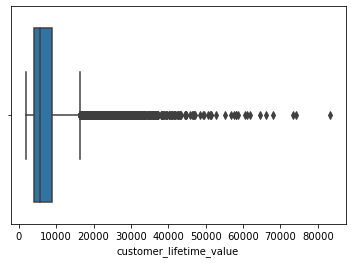

In [31]:
sns.boxplot(numerical['customer_lifetime_value'])

In [32]:
numerical.describe()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,8004.940475,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,6870.967608,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,1898.007675,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,3994.251794,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,5780.182197,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,8962.167041,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,83325.381190,2893.239678


In [33]:
data1 = data.copy()
data1.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [34]:
data1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [35]:
def remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    if len(in_columns) == 0:
        in_columns = df.select_dtypes(np.number).columns
    for column in in_columns:
        if column not in skip_columns:
            print(column)
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            print(upper_limit, lower_limit)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
            print(len(df))
    return df

In [36]:
 data1 = remove_outliers(data1, threshold=1.5, skip_columns = ['number_of_open_complaints']) # we don't want to reduce our data too much,
## but we can play with the parameters to see,
## so after a better analysis we can choose which columns to drop outliers or not
data1.shape

customer_lifetime_value
16414.039911750002 -3457.6210762500014
8317
income
155572.5 -93343.5
8317
monthly_premium_auto
165.5 9.5
8016
months_since_last_claim
48.5 -19.5
8016
months_since_policy_inception
141.5 -46.5
8016
number_of_policies
8.5 -3.5
7617
total_claim_amount
927.2340929999999 -138.932611
7399


(7399, 23)

In [37]:
prep = preprocessing()
prep.funk(data1)
prep.continuous_df.head()

,customer_lifetime_value,total_claim_amount
customer,,
BU79786,2763.519279,384.811147
AI49188,12887.431650,566.472247
WW63253,7645.861827,529.881344
HB64268,2813.692575,138.130879
OC83172,8256.297800,159.383042


### 3. Normalize the continuous variables. You can use any one method you want.


In [38]:

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column]) # calculating lambda 
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci 

In [39]:
import scipy.stats as stats

continuous, _ci = boxcox_transform(prep.continuous_df)
continuous.shape

(7399, 2)

In [40]:
data2 = data1.copy()
data2['customer_lifetime_value'] = continuous['customer_lifetime_value']
data2['total_claim_amount'] = continuous['total_claim_amount']
data2.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [41]:
prep = preprocessing()
prep.funk(data2)
prep.categoricals_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [42]:
data2.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,5.819608,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,112.363222,Two-Door Car,Medsize
AI49188,Nevada,6.572444,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,150.380070,Two-Door Car,Medsize
WW63253,California,6.327800,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,143.007783,SUV,Medsize
HB64268,Washington,5.828968,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,51.608116,Four-Door Car,Medsize
OC83172,Oregon,6.364457,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,57.573301,Two-Door Car,Medsize


In [43]:
import datetime as dt

In [44]:
data3 = data1.copy()

### The time variable can be useful. 
### Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.


In [45]:
data2['effective_to_date_month']= data2['effective_to_date'].dt.month
data2['effective_to_date_month']

customer
BU79786    2
AI49188    2
WW63253    1
HB64268    2
OC83172    1
          ..
YM19146    1
PK87824    2
TD14365    2
UP19263    2
Y167826    2
Name: effective_to_date_month, Length: 7399, dtype: int64

In [46]:
data2['effective_to_date_week']= data2['effective_to_date'].dt.week
data2['effective_to_date_week']

customer
BU79786    8
AI49188    7
WW63253    3
HB64268    5
OC83172    4
          ..
YM19146    1
PK87824    6
TD14365    5
UP19263    5
Y167826    7
Name: effective_to_date_week, Length: 7399, dtype: int64

In [47]:
data2['effective_to_date_day'] = data2['effective_to_date'].dt.day
data2['effective_to_date_day']

customer
BU79786    24
AI49188    19
WW63253    20
HB64268     3
OC83172    25
           ..
YM19146     6
PK87824    12
TD14365     6
UP19263     3
Y167826    14
Name: effective_to_date_day, Length: 7399, dtype: int64

### Encode the categorical variables

In [48]:
data2['coverage'] = data2['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
data2['coverage'].unique()

array([0, 2, 1], dtype=int64)

In [49]:
data2['employment_status'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [50]:
data2['employment_status'] = data2['employment_status'].map({"Employed" : 4, "Unemployed" : 3, "Medical Leave" : 2, "Disabled" : 1, "Retired" : 0})
data2['employment_status'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [51]:
data2['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [52]:
data2['location_code'] = data2['location_code'].map({"Suburban" : 2, "Rural" : 1, 'Urban' : 0})
data2['location_code'].unique()

array([2, 1, 0], dtype=int64)

In [53]:
data2['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [54]:
data2['vehicle_size'] = data2['vehicle_size'].map({"Large" : 2, "Medsize" : 1, 'Small' : 0})
data2['vehicle_size'].unique()

array([1, 0, 2], dtype=int64)

In [55]:
data2.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_month,effective_to_date_week,effective_to_date_day
customer,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,5.819608,No,0,Bachelor,2011-02-24,4,F,56274,2,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,112.363222,Two-Door Car,1,2,8,24
AI49188,Nevada,6.572444,No,2,Bachelor,2011-02-19,4,F,48767,2,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,150.380070,Two-Door Car,1,2,7,19
WW63253,California,6.327800,No,0,Bachelor,2011-01-20,3,M,0,2,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,143.007783,SUV,1,1,3,20
HB64268,Washington,5.828968,No,0,Bachelor,2011-02-03,4,M,43836,1,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,51.608116,Four-Door Car,1,2,5,3
OC83172,Oregon,6.364457,Yes,0,Bachelor,2011-01-25,4,F,62902,1,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,57.573301,Two-Door Car,1,1,4,25


In [56]:
data2.shape

(7399, 26)

In [57]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(data2[['marital_status', 'policy_type','policy','renew_offer_type','sales_channel','vehicle_class']])

OneHotEncoder(drop='first')

In [58]:
encoded = encoder.transform(data2[['marital_status', 'policy_type','policy','renew_offer_type','sales_channel','vehicle_class']]).toarray()
encoded.shape

(7399, 21)

In [59]:
encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [60]:
X_num = data2.select_dtypes(np.number)
X_num.dtypes

customer_lifetime_value          float64
coverage                           int64
employment_status                  int64
income                             int64
location_code                      int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
vehicle_size                       int64
effective_to_date_month            int64
effective_to_date_week             int64
effective_to_date_day              int64
dtype: object

In [61]:
X_num.isna().sum()

customer_lifetime_value          0
coverage                         0
employment_status                0
income                           0
location_code                    0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
vehicle_size                     0
effective_to_date_month          0
effective_to_date_week           0
effective_to_date_day            0
dtype: int64

### 1. Import sklearn train_test_split and separate the data.
### 2. Try a simple linear regression with all the data to see whether we are getting good results.


In [62]:
X = X_num.drop('customer_lifetime_value', axis=1)
y = X_num['customer_lifetime_value']

In [63]:
X = np.concatenate([X, encoded], axis = 1)
X.shape

(7399, 35)

### Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
### Use the function to check LinearRegressor and KNeighborsRegressor.


In [64]:

def model_function_linear(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    return r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)

scores_linear = model_function_linear(X, y)
scores_linear



(0.33057373170340454,
 0.16855369091573125,
 0.2027427816842411,
               true      pred     resid
 customer                              
 HT50748   5.822675  6.004519  0.181844
 LU40443   6.171839  6.288999  0.117160
 PY80506   6.096941  6.222648  0.125706
 FL34139   5.968085  6.210028  0.241942
 QV47358   6.357304  6.061114  0.296189
 UL87052   6.030578  6.212428  0.181851
 IU95336   5.830776  5.917473  0.086697
 SZ17657   6.406019  6.373644  0.032375
 EW34780   6.512459  6.199395  0.313063
 UV80201   6.371825  6.483659  0.111834)

In [65]:

def model_function_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    return knn.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_knn = model_function_knn(X, y)
scores_knn

    
    

(0.01366018620263898,
 0.2024983742343832,
 0.24609755995945626,
               true      pred     resid
 customer                              
 HT50748   5.822675  6.195518  0.372843
 LU40443   6.171839  6.261004  0.089166
 PY80506   6.096941  6.004528  0.092414
 FL34139   5.968085  6.087374  0.119289
 QV47358   6.357304  6.059072  0.298232
 UL87052   6.030578  6.303712  0.273134
 IU95336   5.830776  6.127282  0.296506
 SZ17657   6.406019  6.123023  0.282996
 EW34780   6.512459  6.300300  0.212159
 UV80201   6.371825  6.154892  0.216933)

### You can check also the MLPRegressor for this task!


In [66]:
from sklearn.neural_network import MLPRegressor

def model_function_MPL(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mpl = MLPRegressor()
    mpl.fit(X_train, y_train)
    predictions = mpl.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    return mpl.score(X_test, y_test), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), results.head(10)
    
scores_MPL = model_function_MPL(X, y)
scores_MPL

(-1180.7094439349955,
 6.550623427592162,
 8.518230327749,
               true       pred      resid
 customer                                
 HT50748   5.822675  11.113888   5.291213
 LU40443   6.171839  16.257991  10.086152
 PY80506   6.096941  18.222842  12.125901
 FL34139   5.968085   6.174416   0.206331
 QV47358   6.357304  10.832397   4.475093
 UL87052   6.030578   6.438628   0.408050
 IU95336   5.830776   8.824883   2.994106
 SZ17657   6.406019  14.712257   8.306238
 EW34780   6.512459   8.554511   2.042053
 UV80201   6.371825   7.110141   0.738316)

# Random variable distributions Lab

### 1. Get the numerical variables from our dataset.


In [67]:
X_num_3 = data3.select_dtypes(np.number)
X_num_3.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


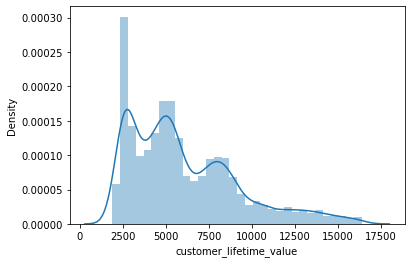

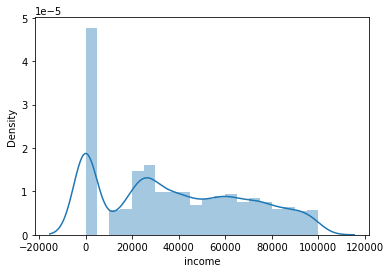

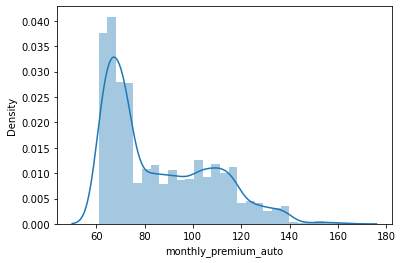

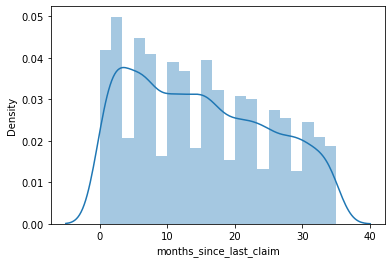

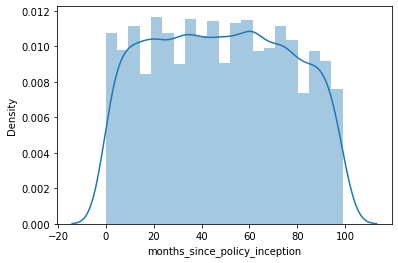

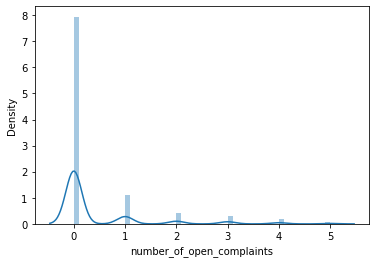

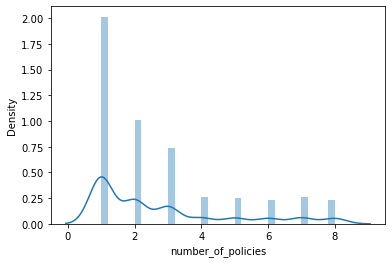

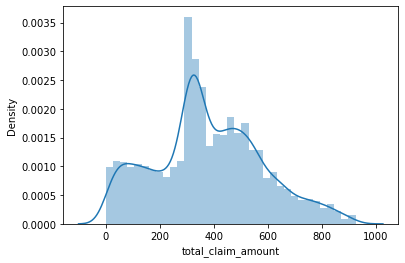

In [68]:
for column in X_num_3.select_dtypes(np.number).columns:
    sns.distplot(X_num_3[column])
    plt.show()

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### LOG TRANSFORM

In [69]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

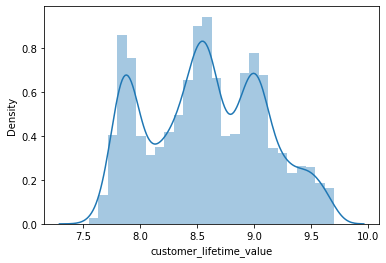

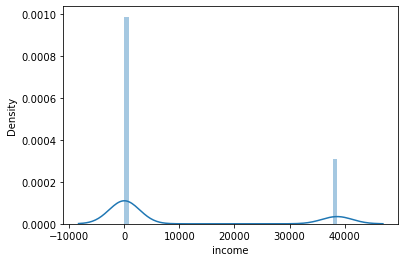

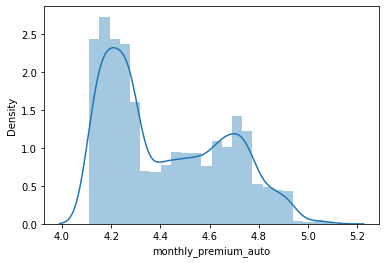

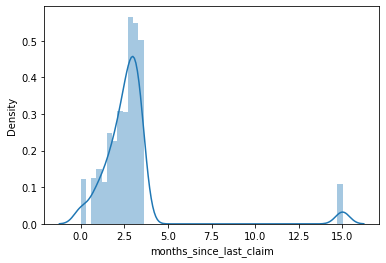

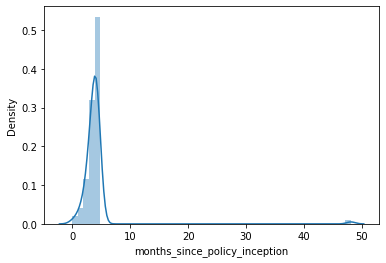

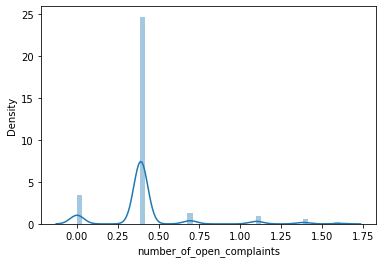

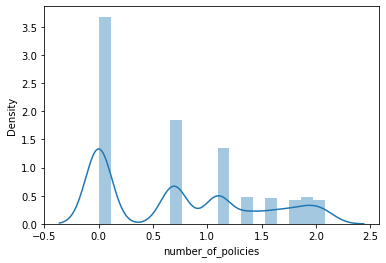

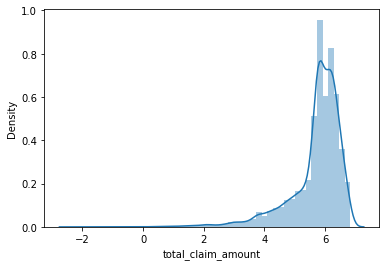

In [70]:
logtransform = X_num_3
for column in logtransform.columns:
    logtransform[column] = logtransform[column].apply(log_transform).fillna(logtransform[column].mean())
    sns.distplot(logtransform[column])
    plt.show()

### MINMAX SCALER

In [71]:
from sklearn.preprocessing import MinMaxScaler

def minmax_transform(data): 
    transformer = MinMaxScaler().fit(data)
    x_min_max = transformer.transform(data)
    return pd.DataFrame(x_min_max, columns = data.columns)


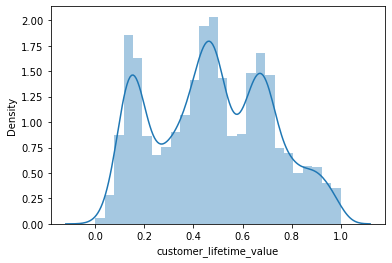

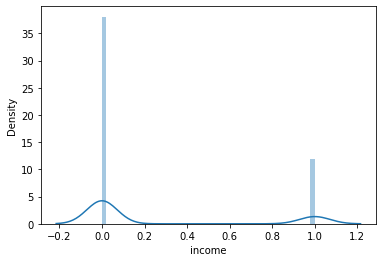

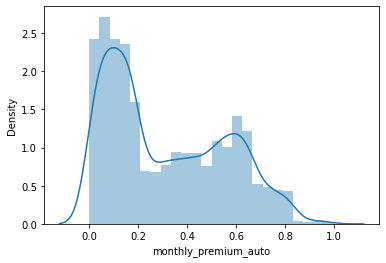

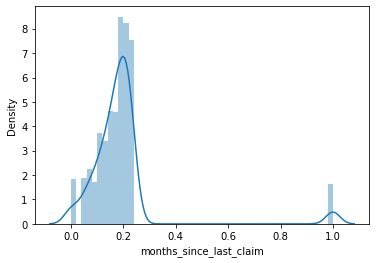

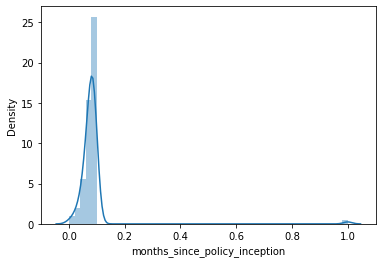

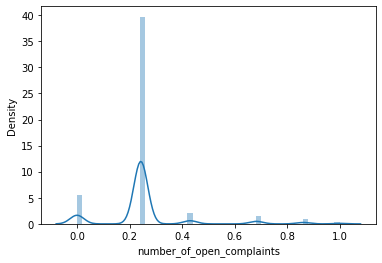

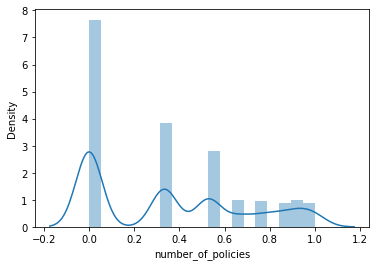

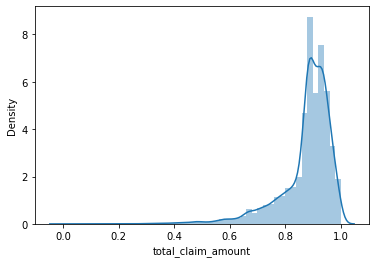

In [72]:
minmax = minmax_transform(X_num_3)
for column in minmax.columns:
    sns.distplot(minmax[column])
    plt.show()

### NORMAL TRANSFORM

In [73]:
from sklearn.preprocessing import Normalizer
def normalizer_transform(data): 
    transformer = Normalizer().fit(data)
    nums_norm = pd.DataFrame(transformer.transform(data), columns=data.columns)
    return nums_norm

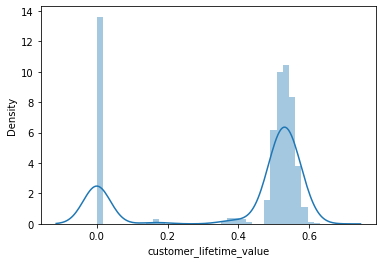

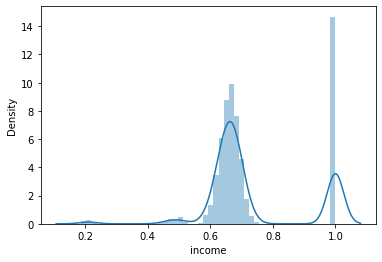

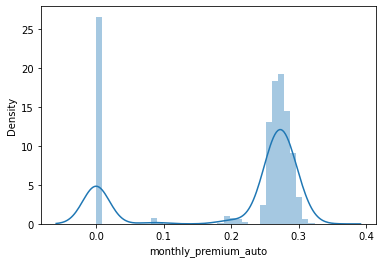

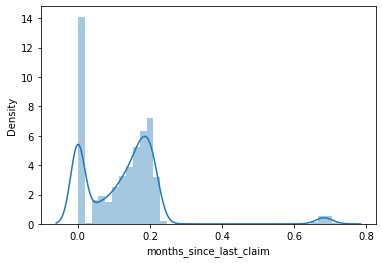

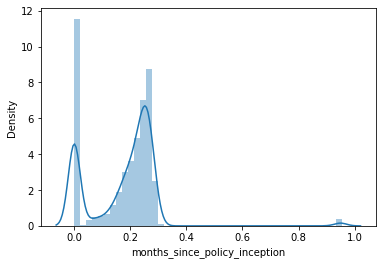

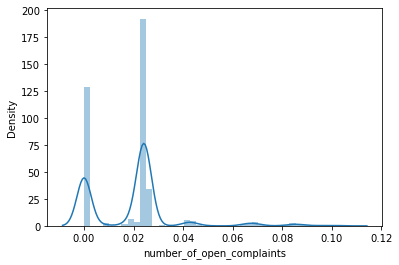

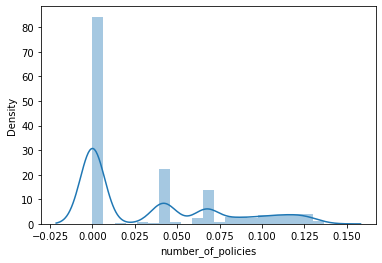

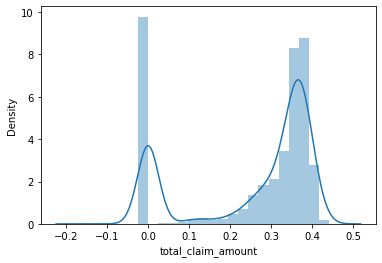

In [74]:
normalized = normalizer_transform(X_num_3)
for column in normalized.columns:
    sns.distplot(normalized[column])
    plt.show()

### STANDARD SCALER

In [75]:
from sklearn.preprocessing import StandardScaler
def stdscaler_transform(data): 
    transformer = StandardScaler().fit(data)
    return pd.DataFrame(transformer.transform(data), columns=data.columns)

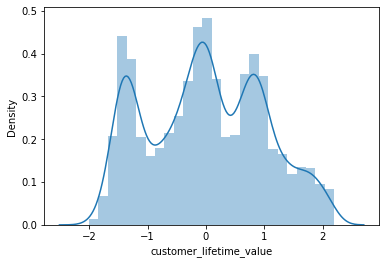

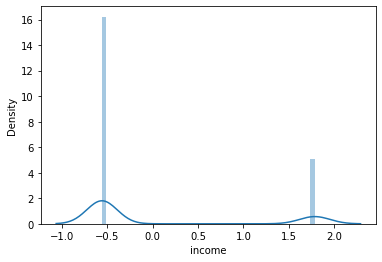

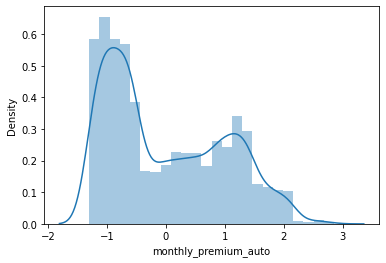

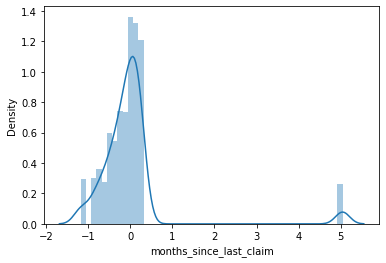

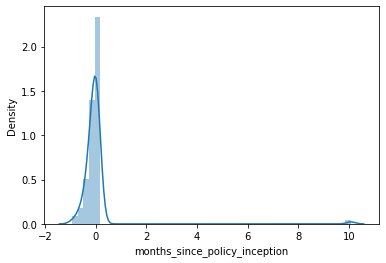

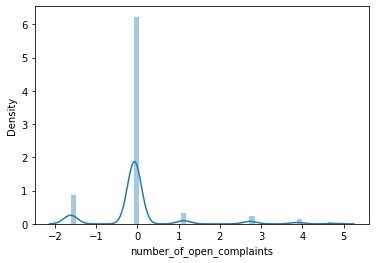

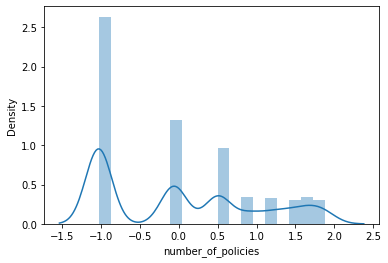

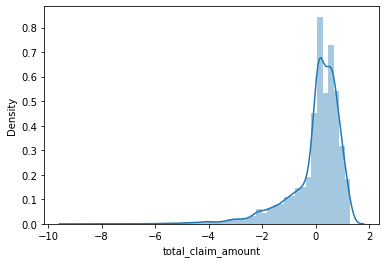

In [76]:
stdscale = stdscaler_transform(X_num_3)
for column in stdscale.columns:
    sns.distplot(stdscale[column])
    plt.show()

### BOX COX TRANSFORM

In [89]:
boxcox, _ci = boxcox_transform(X_num_3)

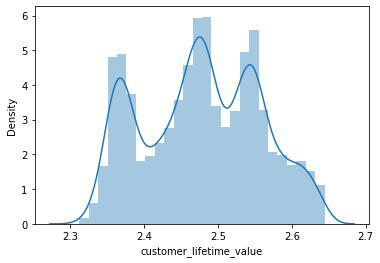

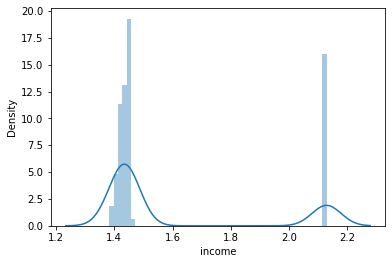

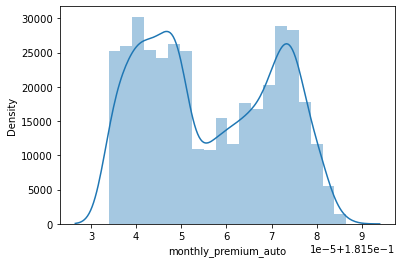

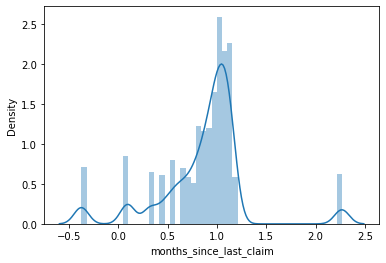

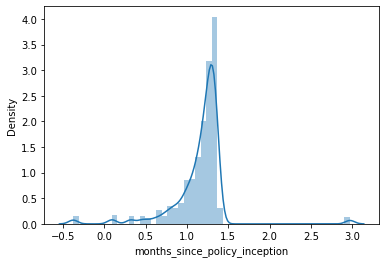

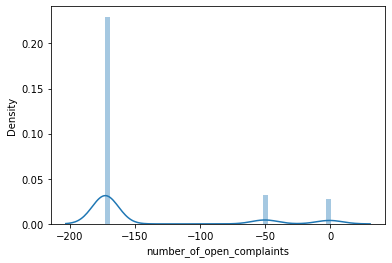

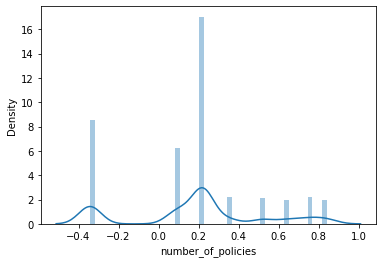

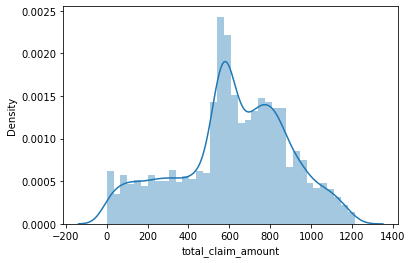

In [78]:
for column in boxcox.columns:
    sns.distplot(boxcox[column])
    plt.show()

### SQUARE TRANSFORM

In [79]:
def sqrt_transform(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

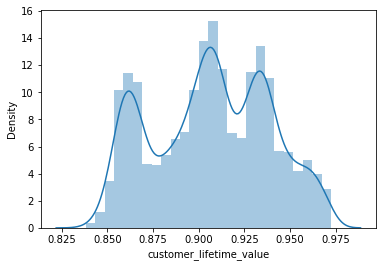

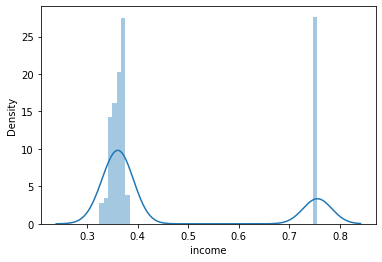

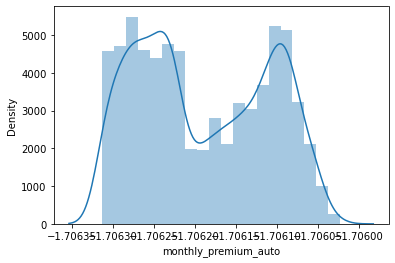

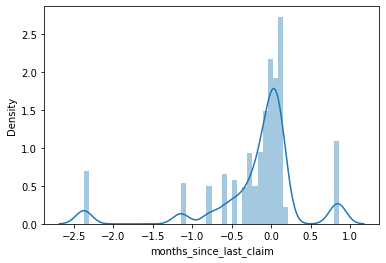

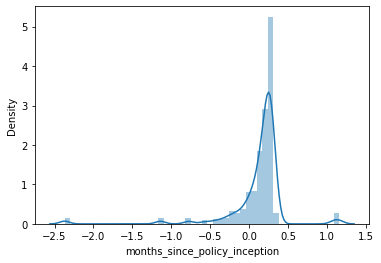

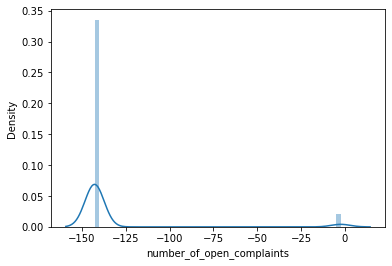

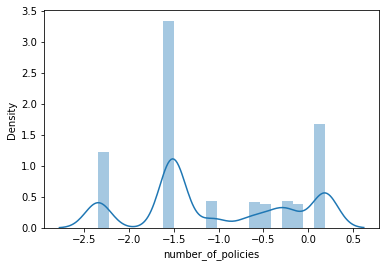

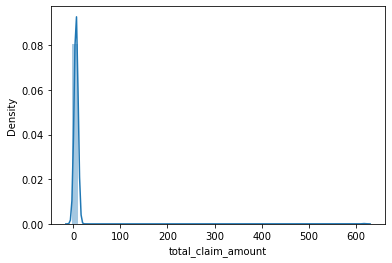

In [80]:
sqrttransform = X_num_3
for column in sqrttransform.columns:
    sqrttransform[column] = sqrttransform[column].apply(log_transform).fillna(sqrttransform[column].mean())
    sns.distplot(sqrttransform[column])
    plt.show()

### POWER SCALING

In [85]:
from sklearn.preprocessing import PowerTransformer
def power_transform(data): 
    transformer = PowerTransformer().fit(data)
    return pd.DataFrame(transformer.transform(data), columns=data.columns)


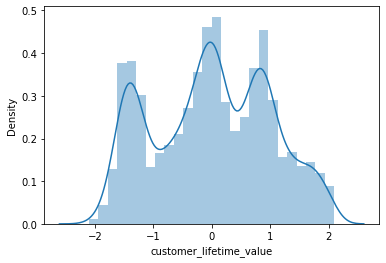

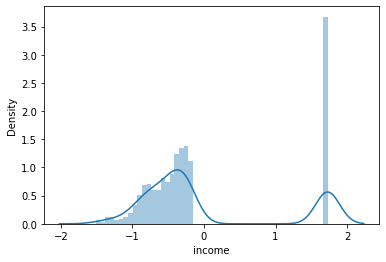

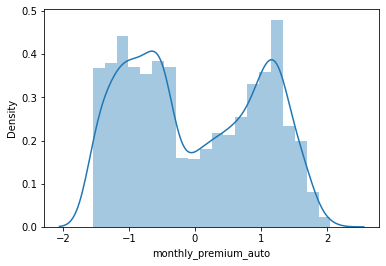

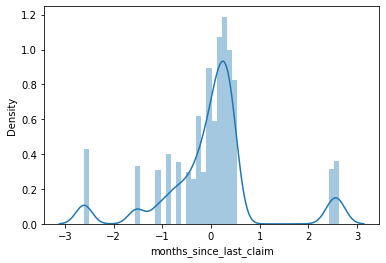

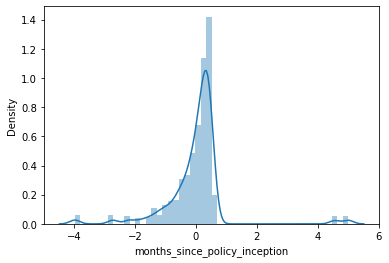

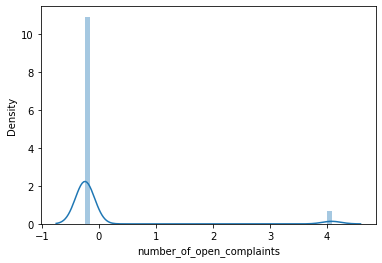

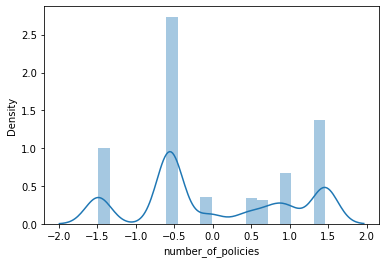

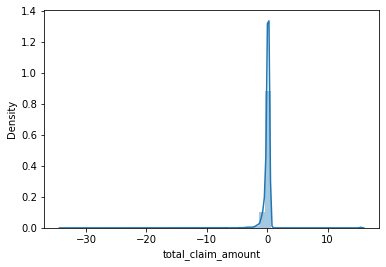

In [86]:
ptrans = power_transform(X_num_3)
for column in ptrans.columns:
    sns.distplot(ptrans[column])
    plt.show()

### ROBUST SCALING

In [87]:
from sklearn.preprocessing import RobustScaler
def robustscl_transform(data): 
    transformer = RobustScaler().fit(data)
    return pd.DataFrame(transformer.transform(data), columns=data.columns)


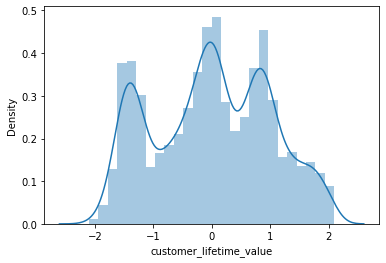

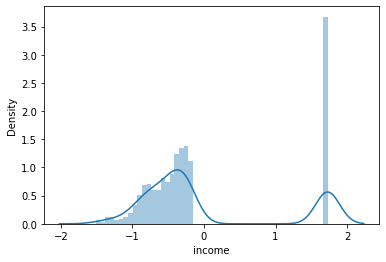

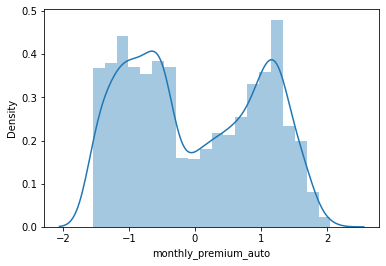

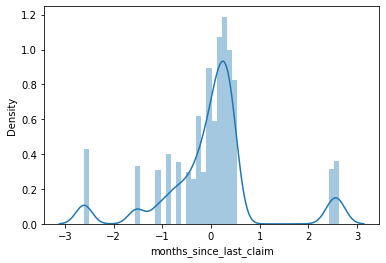

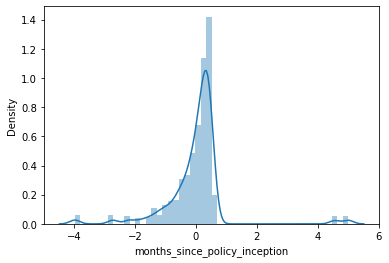

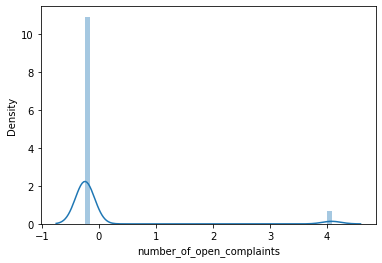

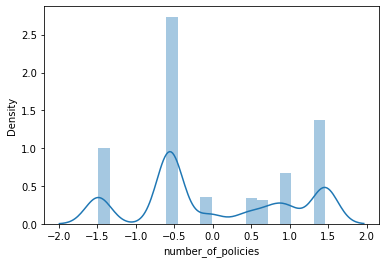

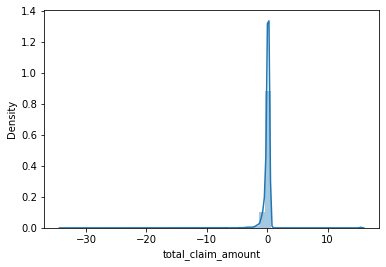

In [88]:
robust = robustscl_transform(X_num_3)
for column in ptrans.columns:
    sns.distplot(ptrans[column])
    plt.show()